<b>Trabalho Prático 1 Aprendizado de Máquina: Redes Neuronais <br> </b>
Aluno: Nélio Cezar Muniz Sampaio <br>
Matrícula: 2015042150

<h6>Introdução</h6>

Este trabalho tem como objetivo aplicar os conceitos aprendidos na disciplina aprendizado de máquina como forma de consolidar e praticar o conhecimento adquirido. O trabalho consiste em utilizar uma rede neuronal de três camadas para distinguir números escritos à mão em imagens de 24x24 pixels. Os dados utilizados para treino e teste foram disponibilizados no formato a ser lido sendo a primeira coluna contendo o número ao qual correspondia a imagem e, o resto da linha, contendo a imagem em si.

Ao ler o arquivo, foi necessário normalizar os valores dos pixels. Para ler, tratar e manipular os dados foi utilizada as bibliotecas panda e numpy do python. O trecho de código a seguir é responsável por deixar os dados já separados em dados de treino e de teste.

In [1]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importando dados
dataset = pd.read_csv('data_tp1')

#Separando em (x, y)
x = dataset.iloc[:, 1:785].values / 255
y = dataset.iloc[:, 0]

# Transformando saída em vetor.
y2 = y
conv_arr = y2.values

d = [ [] for i in range(len(conv_arr))]
for ind, i in enumerate(conv_arr):
    for j in range(10):
        if i==j:
            d[ind].append(1)
        else:
            d[ind].append(0)

df = pd.DataFrame(data=d)

#Separando em conjunto de treino e conjunto de teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, df, test_size = 0.2, random_state = 0 )

<h6>Implementação</h6>

A implementação da rede neuronal foi feita através da biblioteca Keras do python. Para todas as redes implementadas neste trabalho, a estrutura é a mesma, variando alguns parâmetros de acordo com o teste. A estrutura consiste em adicionar à rede uma camada responsável pela leitura dos dados - camada de entrada -, uma camada oculta onde o número de neurônios varia de acordo com o teste ou mantendo o padrão de 50 quando o número não é levado em consideração e a última camada contendo 10 neurônios de saída sendo cada um representante de um dígito 0-9.

Os testes realizados comparam a acurácia e a perda dos modelos por época para os parâmetros utilizados para comparação. Primeiramente, é comparado o número de neurônios na camada oculta, em seguida é variada a taxa de aprendizado e, por último o algoritmo utilizado para o cálculo do gradiente. A função de perda utilizada é representadaa seguir:

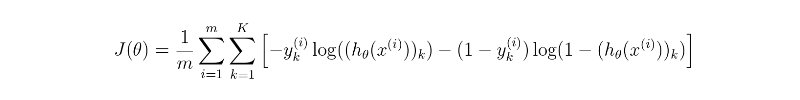

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

<h6>Variação do número de unidades na camada oculta</h6>

Como dito antes, nessa parte do trabalho será comparada a acurácia da rede neuronal de acordo com o número de neurônios na camada oculta. Os testes são realizados com o 25, 50 e 100 neurônios na camada. Primeiramente são adicionadas às respectivas redes as camadas de acordo com o teste.

In [3]:
# Inicializando a ANN
classifier_25 = Sequential()
classifier_50 = Sequential()
classifier_100 = Sequential()

#Adiciona Camadas:

# Adicionando input layer e a hidden layer
# units: neuronios na hidden layer; kernel_initializer: inicializar os pesos aleatoriamente; 
# activation: função de ativação; input_dim: neurônios na input layer.

# 25 Unidades na camada oculta
classifier_25.add( Dense(units=25, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_25.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

# 50 Unidades na camada oculta:
classifier_50.add( Dense(units=50, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_50.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

# 100 Unidades na camada oculta:
classifier_100.add( Dense(units=100, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_100.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

#
sgd = optimizers.SGD(lr=0.5)

# Compilando
classifier_25.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
classifier_50.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
classifier_100.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

epocas = 100

history = classifier_25.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=10, epochs=epocas, verbose=0)
accuracy_25 = history.history["acc"]
model_accuracy_25 = history.history['val_acc']
loss_25 = history.history['val_loss']

history = classifier_50.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=10, epochs=epocas, verbose=0)
accuracy_50 = history.history["acc"]
model_accuracy_50 = history.history['val_acc']
loss_50 = history.history['val_loss']

history = classifier_100.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=10, epochs=epocas, verbose=0)
accuracy_100 = history.history["acc"]
model_accuracy_100 = history.history['val_acc']
loss_100 = history.history['val_loss']

Os dois gráficos a seguir comparam respectivamente a acurácia de cada modelo e a perda em cada um. Os testes demonstram pouca variação no resultado quando varia-se o número de neurônios na camada oculta. Entretanto, é perceptível uma acurácia pouco maior com 50 neurônios e com 100 neurônios, nessa ordem. Quanto à perda a diferença entre 50 e 100 neurônios se torna imperceptível.

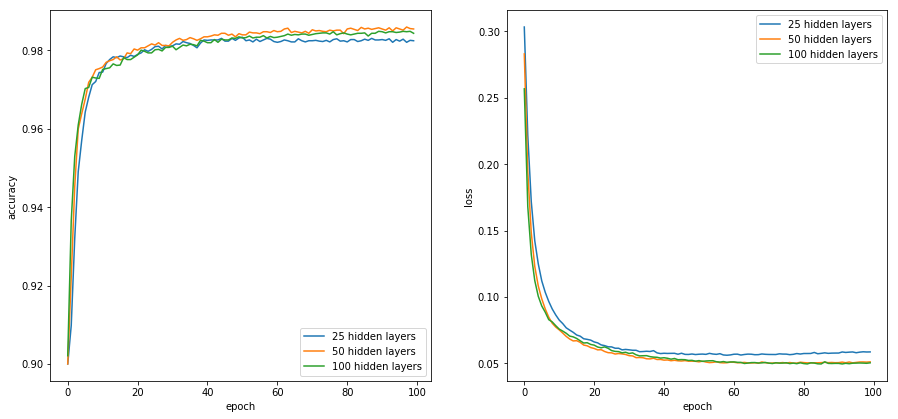

In [24]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.plot(model_accuracy_25)
ax1.plot(model_accuracy_50)
ax1.plot(model_accuracy_100)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( ['25 hidden layers', '50 hidden layers', '100 hidden layers'], loc='lower right' )

ax2 = fig.add_subplot(222)
ax2.plot(loss_25)
ax2.plot(loss_50)
ax2.plot(loss_100)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( ['25 hidden layers', '50 hidden layers', '100 hidden layers'], loc='upper right' )

plt.show()

<h6>Variação do learning rate</h6>

O teste a seguir visa comparar a rede utilizando diferentes taxas de aprendizado. Os parâmetros utilizados foram 0.5, 1 e 10. Em seguida são comparados os resultados da acurácia e perda para cada modelo.

In [5]:
# Inicializando a ANN
classifier_05 = Sequential()
classifier_1 = Sequential()
classifier_10 = Sequential()

#Adiciona Camadas:

# Adicionando input layer e a hidden layer
# units: neuronios na hidden layer; kernel_initializer: inicializar os pesos aleatoriamente; 
# activation: função de ativação; input_dim: neurônios na input layer.

# 25 Unidades na camada oculta
classifier_05.add( Dense(units=50, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_05.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

# 50 Unidades na camada oculta:
classifier_1.add( Dense(units=50, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_1.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

# 100 Unidades na camada oculta:
classifier_10.add( Dense(units=50, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_10.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

#
sgd5 = optimizers.SGD(lr=0.5)
sgd1 = optimizers.SGD(lr=1)
sgd10 = optimizers.SGD(lr=10)

# Compilando
classifier_05.compile(optimizer=sgd5, loss='binary_crossentropy', metrics=['accuracy'])
classifier_1.compile(optimizer=sgd1, loss='binary_crossentropy', metrics=['accuracy'])
classifier_10.compile(optimizer=sgd10, loss='binary_crossentropy', metrics=['accuracy'])

epocas = 50

history = classifier_05.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=10, epochs=epocas, verbose=0)
accuracy_05 = history.history["acc"]
model_accuracy_05 = history.history['val_acc']
loss_05 = history.history['val_loss']

history = classifier_1.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=10, epochs=epocas, verbose=0)
accuracy_1 = history.history["acc"]
model_accuracy_1 = history.history['val_acc']
loss_1 = history.history['val_loss']

history = classifier_10.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=10, epochs=epocas, verbose=0)
accuracy_10 = history.history["acc"]
model_accuracy_10 = history.history['val_acc']
loss_10 = history.history['val_loss']

Os gráficos a seguir mostram respectivamente a acurácia e a perda para os modelos testados. A curva que representa a maior acurácia no primeiro gráfico tem a taxa de aprendizado 10, seguida pela taxa de aprendizado de 1 e de 0.5. Quanto à perda, a ordem permanece da menor para maior taxa de aprendizado 10, seguida pela taxa de 1 e de 0.5 até aproximadamente a vigésima época, onde a curva com taxa de aprendizado 10 cresce e torna-se maior que a de taxa 1 e, após a trigésima época passa a de taxa 0.5.

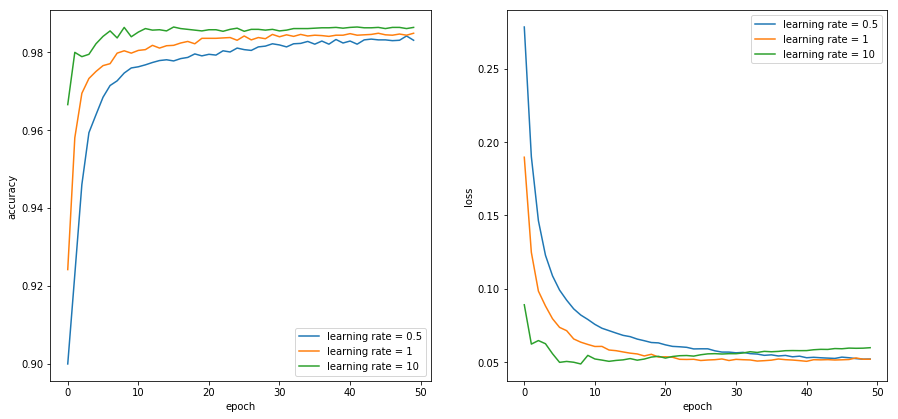

In [19]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.plot(model_accuracy_05)
ax1.plot(model_accuracy_1)
ax1.plot(model_accuracy_10)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( ['learning rate = 0.5', 'learning rate = 1', 'learning rate = 10'], loc='lower right' )

ax2 = fig.add_subplot(222)
ax2.plot(loss_05)
ax2.plot(loss_1)
ax2.plot(loss_10)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( ['learning rate = 0.5', 'learning rate = 1', 'learning rate = 10'], loc='upper right' )

plt.show()

<h6>Variação do algoritmo de calculo de gradiente</h6>

Por fim, o último parâmetro a ser avaliado é o algoritmo para cálculo do gradiente. Os algoritmos testados foram: gradient descent atualizando os pesos após cada época; stochastic descent gradient, atualizando após cada teste e mini-batch atualizando a cada 10 e 50 testes.

In [33]:
# Inicializando a ANN
classifier_sgd = Sequential()
classifier_gd = Sequential()
classifier_b10 = Sequential()
classifier_b50 = Sequential()

#Adiciona Camadas:

# Adicionando input layer e a hidden layer
# units: neuronios na hidden layer; kernel_initializer: inicializar os pesos aleatoriamente; 
# activation: função de ativação; input_dim: neurônios na input layer.

# 25 Unidades na camada oculta
classifier_sgd.add( Dense(units=50, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_sgd.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

# 50 Unidades na camada oculta:
classifier_gd.add( Dense(units=50, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_gd.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

# 100 Unidades na camada oculta:
classifier_b10.add( Dense(units=50, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_b10.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

# 100 Unidades na camada oculta:
classifier_b50.add( Dense(units=50, kernel_initializer='uniform', activation='sigmoid', input_dim=784) )
classifier_b50.add( Dense(units=10, kernel_initializer='uniform', activation='sigmoid') )

#
#sgd = optimizers.SGD()
gd = optimizers.SGD()
#gd10 = optimizers.Adadelta()

# Compilando
classifier_sgd.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
classifier_gd.compile(optimizer=gd, loss='binary_crossentropy', metrics=['accuracy'])
classifier_b10.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
classifier_b50.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

epocas = 50

history = classifier_sgd.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=1, epochs=epocas, verbose=0)
accuracy_sgd = history.history["acc"]
model_accuracy_sgd = history.history['val_acc']
loss_sgd = history.history['val_loss']

history = classifier_gd.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=4000, epochs=epocas, verbose=0)
accuracy_gd = history.history["acc"]
model_accuracy_gd = history.history['val_acc']
loss_gd = history.history['val_loss']

history = classifier_b10.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=10, epochs=epocas, verbose=0)
accuracy_b10 = history.history["acc"]
model_accuracy_b10 = history.history['val_acc']
loss_b10 = history.history['val_loss']

history = classifier_b50.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=50, epochs=epocas, verbose=0)
accuracy_b50 = history.history["acc"]
model_accuracy_b50 = history.history['val_acc']
loss_b50 = history.history['val_loss']

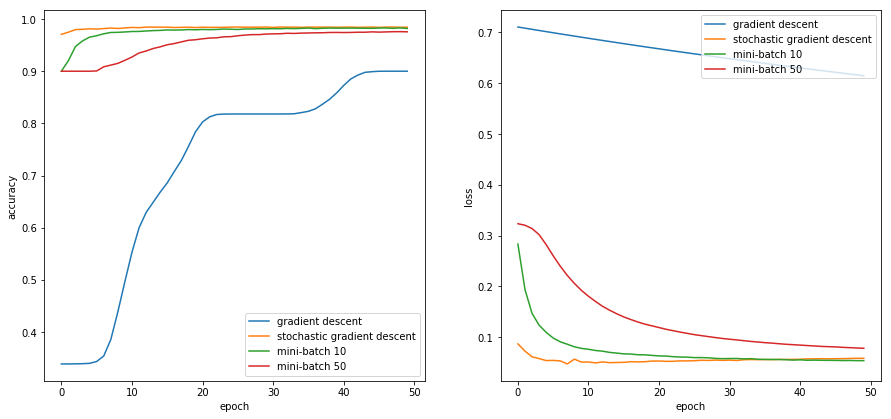

In [34]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.plot(model_accuracy_gd)
ax1.plot(model_accuracy_sgd)
ax1.plot(model_accuracy_b10)
ax1.plot(model_accuracy_b50)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend( ['gradient descent', 'stochastic gradient descent', 'mini-batch 10', 'mini-batch 50'], loc='lower right' )

ax2 = fig.add_subplot(222)
ax2.plot(loss_gd)
ax2.plot(loss_sgd)
ax2.plot(loss_b10)
ax2.plot(loss_b50)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend( ['gradient descent', 'stochastic gradient descent', 'mini-batch 10', 'mini-batch 50'], loc='upper right' )

plt.show()